In [3]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#carichiamo il datasets
df =pd.read_csv('boston.csv',header=1)

In [5]:
df.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5


In [6]:
df.shape

(506, 14)

**Data Set Characteristics:**
 
    :Number of Instances: 506 
 
    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
 
    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
 
    :Missing Attribute Values: None
 
    :Creator: Harrison, D. and Rubinfeld, D.L.

<https://teams.microsoft.com/l/message/19:b7d13b93870a4ed88fa16828d826b738@thread.tacv2/1695369149290?tenantId=552bed02-4512-450c-858d-84cfe2b4186d&amp;groupId=d9fbd27d-81fa-4b16-a319-b4bc2e94e27f&amp;parentMessageId=1695369149290&amp;teamName=ITS Big Data corso B 22-24&amp;channelName=11 - Artificial Intelligence&amp;createdTime=1695369149290&amp;allowXTenantAccess=false>

In [7]:
# rinominare l'ultima colonna da MEDV a price (HO SBAGLIATO A NOMINARE LA COLONNA PER QUESTO C'è price E NON MEDV
# Rinomina l'ultima colonna
df = df.rename(columns={'MEDV': 'PRICE'})

# Crea un nuovo DataFrame con la colonna 'price'

df_target = df[['PRICE']]

In [8]:
# poi salvala in un dataframe target

df_target[['PRICE']].to_csv('price_column.csv', index=False)

print(df_target.head(9))

   PRICE
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2
5   28.7
6   22.9
7   27.1
8   16.5


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


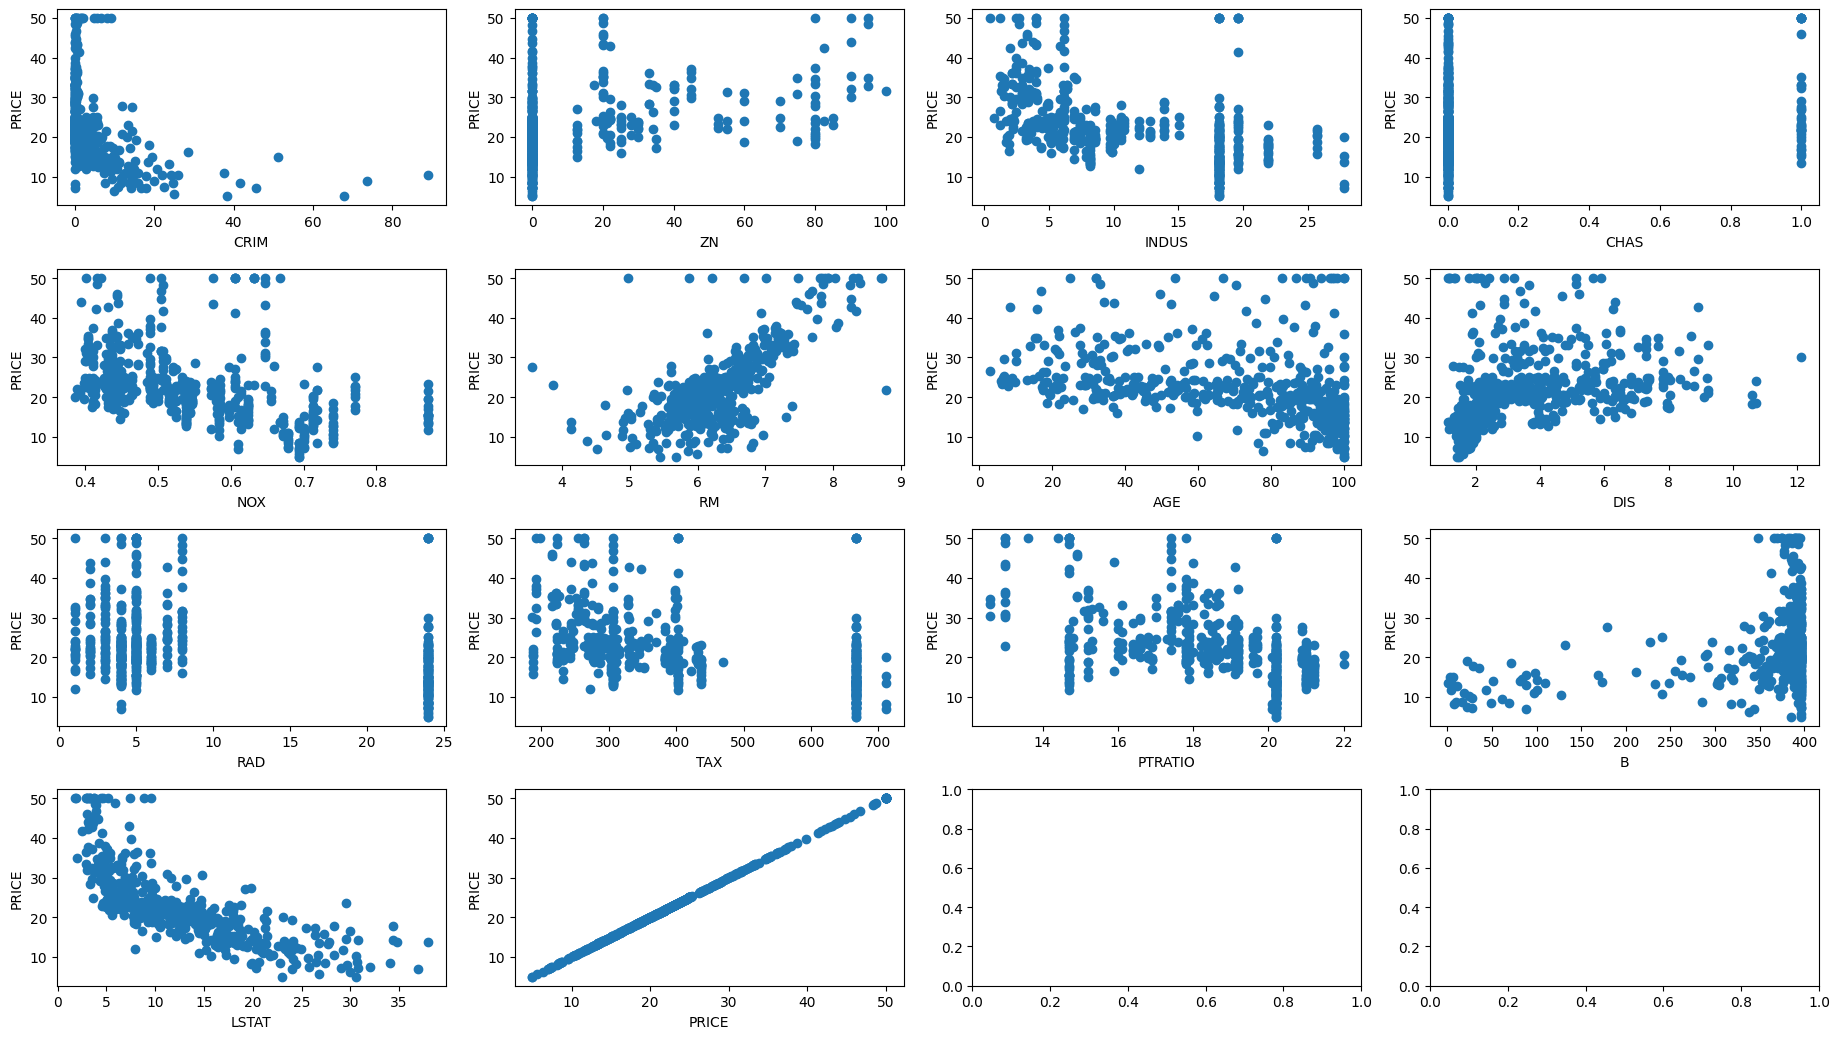

In [10]:
fig,axs=plt.subplots(4,4)
fig.set_size_inches(18.5, 10.5)

for ax, feature in zip(fig.axes, df[:0]):
    ax.scatter(df[feature],df.PRICE)
    ax.set_xlabel(feature)
    ax.set_ylabel('PRICE')

fig.tight_layout()

In [11]:
correlation = df['PRICE'].corr(df['RM'])

print(f"La correlazione tra PRICE e RM è: {correlation}")

La correlazione tra PRICE e RM è: 0.6953599470715396


In [12]:
correlation = df['PRICE'].corr(df['CHAS'])

print(f"La correlazione tra PRICE e CHAS è: {correlation}")

La correlazione tra PRICE e CHAS è: 0.17526017719029852


In [13]:
fit=np.polyfit(df['RM'],df['PRICE'],deg=1)
regression_line=np.poly1d(fit)

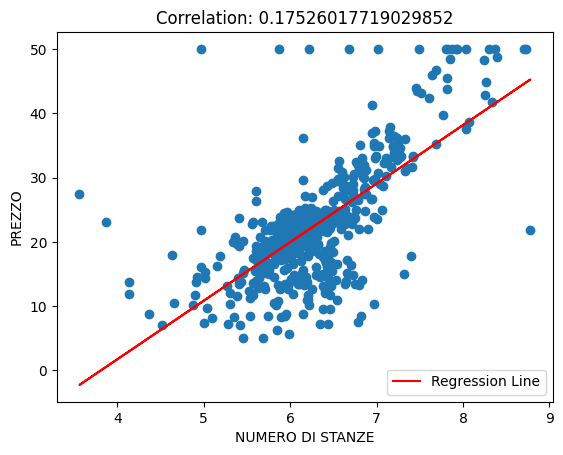

In [14]:
plt.scatter(df['RM'],df['PRICE'])
plt.plot(df['RM'],regression_line(df['RM']), color='red', label='Regression Line')
plt.title('Correlation: {}'.format(correlation))
plt.xlabel('NUMERO DI STANZE')
plt.ylabel('PREZZO')
plt.legend()
plt.show()


In [15]:
#splittare il dataset in test e traning,scegliamo il modello quindi linear regression e applicarlo

In [16]:
X = df.drop('PRICE', axis=1)  
y = df['PRICE']             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [17]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Errore quadratico medio (MSE): {mse}")
print(f"R-squared : {r2}")

Errore quadratico medio (MSE): 27.949660331548866
R-squared : 0.7413935597999859


In [18]:
corr=pd.DataFrame()
corr['features']=X.columns
corr['estimatedCoefficent']= model.coef_
corr

,features,estimatedCoefficent
0,CRIM,-0.114466
1,ZN,0.048100
2,INDUS,-0.029328
3,CHAS,2.331535
4,NOX,-17.523530
5,RM,3.715946
6,AGE,0.008471
7,DIS,-1.533703
8,RAD,0.303127
9,TAX,-0.011491


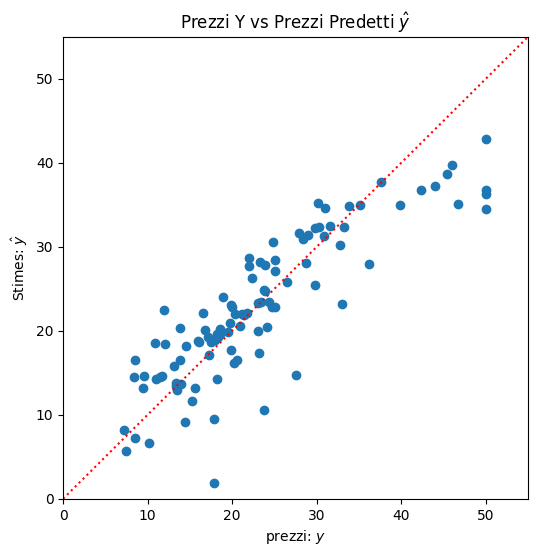

In [19]:
#Visualizziamo i prezzi reali $y$ rispetto a quelli predetti $\hat{y}$

plt.figure(figsize=(6,6))
plt.scatter(y_test,y_pred)
plt.xlabel("prezzi: $y$")
plt.xlim(0, 55)
plt.ylabel("Stimes: $\hat{y}$")
plt.ylim(0,55)
plt.title("Prezzi Y vs Prezzi Predetti $\hat{y}$")
plt.plot([0,60],[0,60], 'r:')
plt.show()

In [20]:
df =pd.read_csv('winequality-white.csv',delimiter=";")

In [21]:
df.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
